### Problem 1:
**You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.**


In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split, GridSearchCV
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

**Importing data**

In [2]:
df=pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.drop("Unnamed: 0",axis=1, inplace=True)

In [5]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


**EDA**

In [6]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


**Data type of data features**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


**Null value Check**

In [8]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

**Making different list for categorical columns and numerical columns**

In [9]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [10]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

vote : 0
gender : 0


**Data preprocessing**

**Check for duplicate data**

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1517 
no. of columns:  9


In [14]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [15]:
df[cat].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


**unique values for categorical variables**

In [16]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




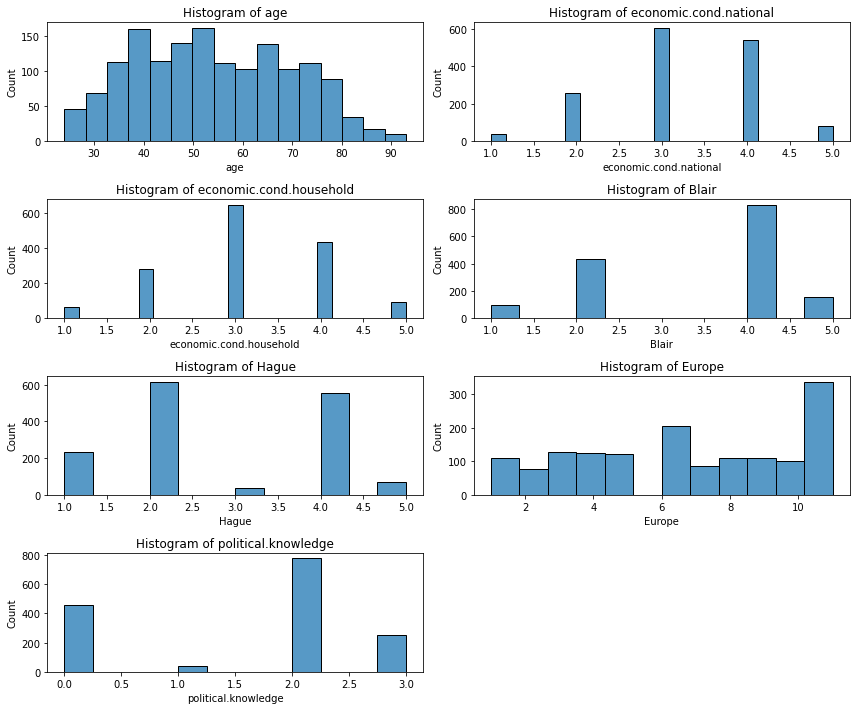

In [17]:
plt.figure(figsize = (12,12))
feature_list = num
for i in range(len(feature_list)):
    plt.subplot(5,2, i + 1)
    sns.histplot(x = df[feature_list[i]], data = df)
    plt.title('Histogram of {}'.format(feature_list[i])) 
    plt.tight_layout()

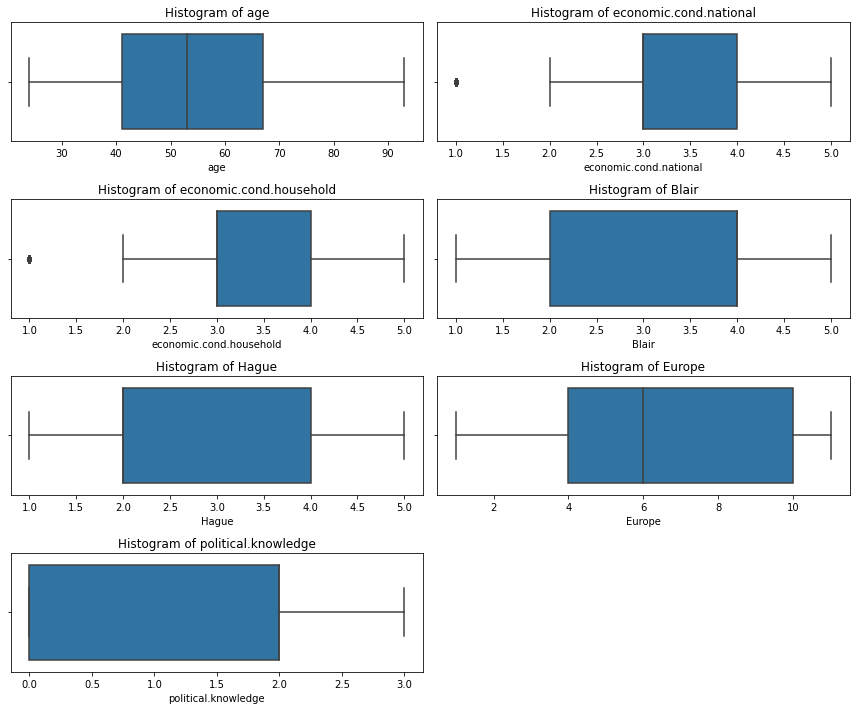

In [18]:
plt.figure(figsize = (12,12))
feature_list = num
for i in range(len(feature_list)):
    plt.subplot(5,2, i + 1)
    sns.boxplot(x = df[feature_list[i]], data = df)
    plt.title('Histogram of {}'.format(feature_list[i])) 
    plt.tight_layout()

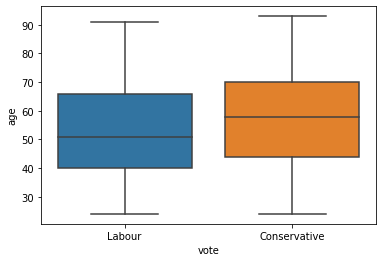

In [19]:
sns.boxplot(df['vote'],df['age']);

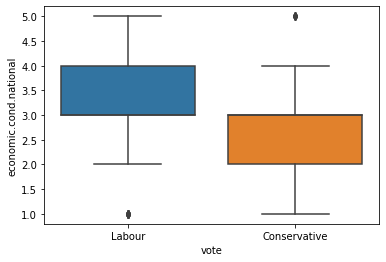

In [20]:
sns.boxplot(df['vote'],df['economic.cond.national']);

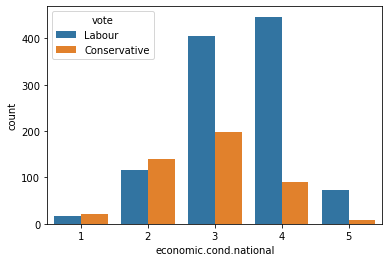

In [21]:
sns.countplot(df['economic.cond.national'],hue=df['vote']);

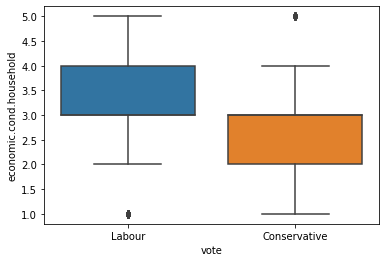

In [22]:
sns.boxplot(df['vote'],df['economic.cond.household']);

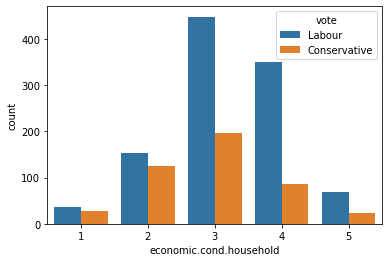

In [23]:
sns.countplot(df['economic.cond.household'],hue = df['vote']);

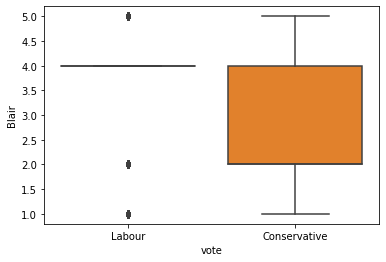

In [24]:
sns.boxplot(df['vote'],df['Blair']);

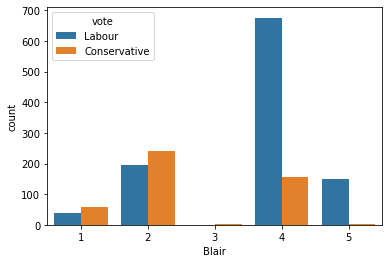

In [25]:
sns.countplot(df['Blair'],hue = df['vote']);

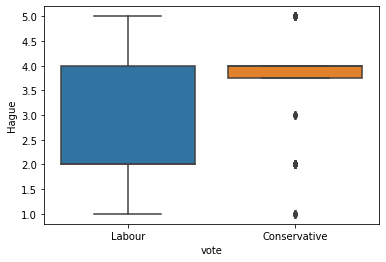

In [26]:
sns.boxplot(df['vote'],df['Hague']);

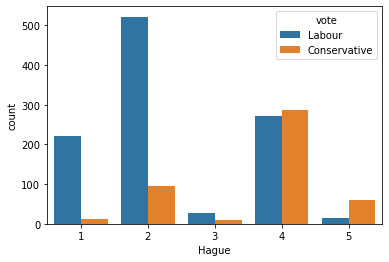

In [27]:
sns.countplot(df['Hague'],hue=df['vote']);

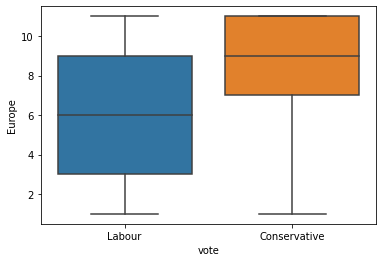

In [28]:
sns.boxplot(df['vote'],df['Europe']);

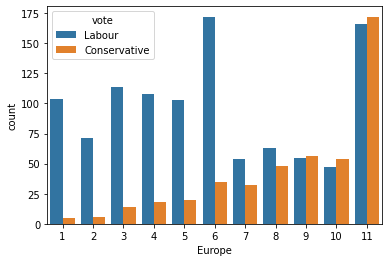

In [29]:
sns.countplot(df['Europe'],hue=df['vote']);

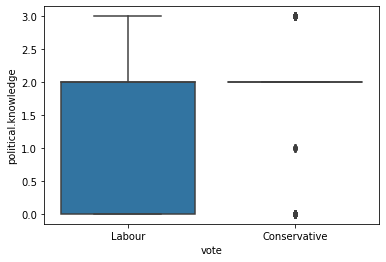

In [30]:
sns.boxplot(df['vote'],df['political.knowledge']);

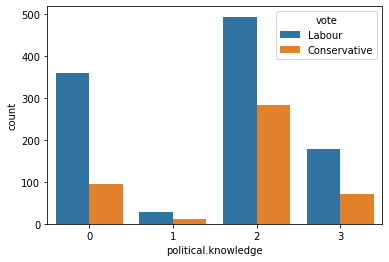

In [31]:
sns.countplot(df['political.knowledge'],hue = df['vote']);

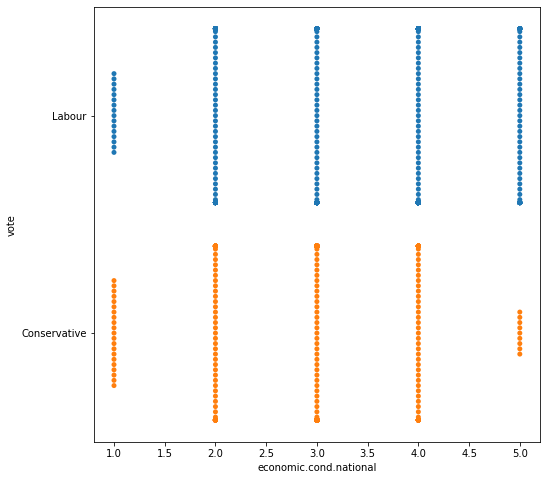

In [32]:
plt.figure(figsize=(8,8))
sns.swarmplot(df["economic.cond.national"], df['vote']) 
plt.show()

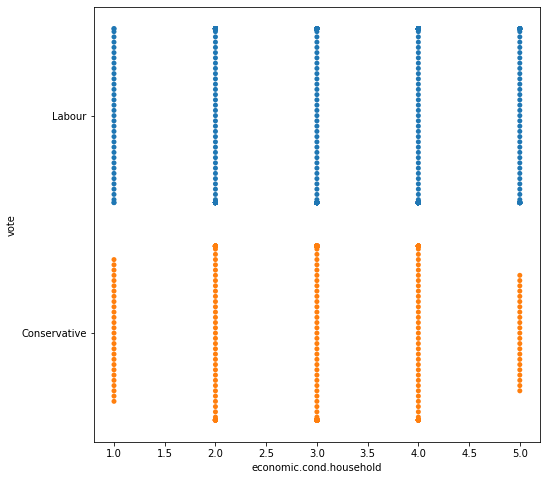

In [33]:
plt.figure(figsize=(8,8))
sns.swarmplot(df["economic.cond.household"], df['vote']) 
plt.show()

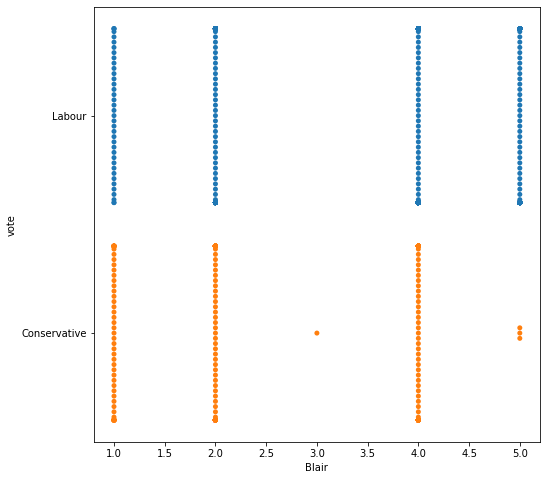

In [34]:
plt.figure(figsize=(8,8))
sns.swarmplot(df["Blair"], df['vote']) 
plt.show()

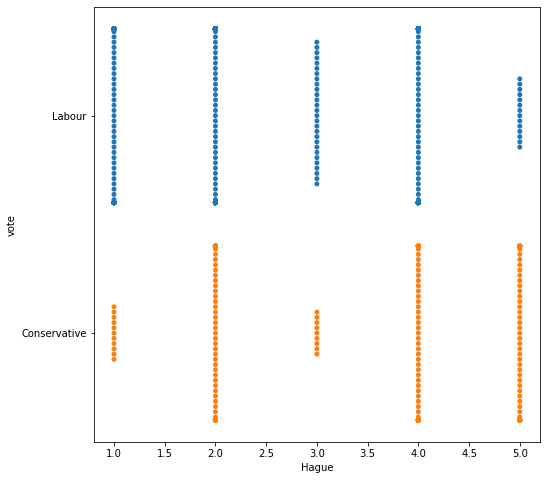

In [35]:
plt.figure(figsize=(8,8))
sns.swarmplot(df["Hague"], df['vote']) 
plt.show()

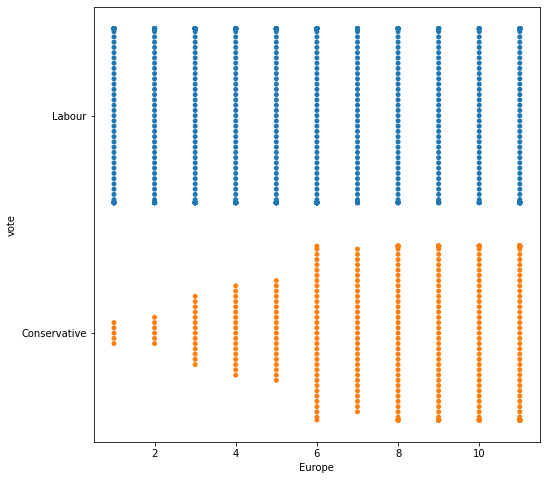

In [36]:
plt.figure(figsize=(8,8))
sns.swarmplot(df["Europe"], df['vote']) 
plt.show()

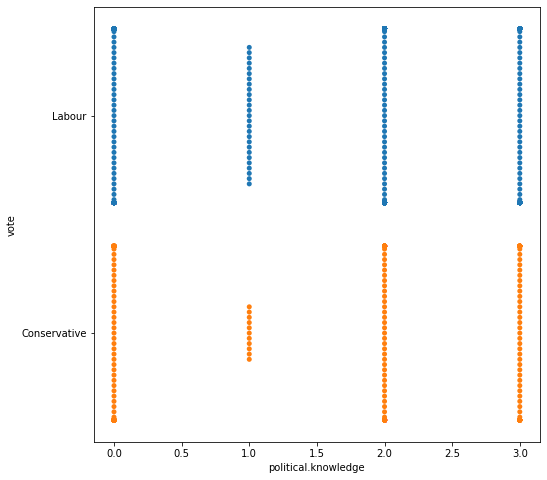

In [37]:
plt.figure(figsize=(8,8))
sns.swarmplot(df["political.knowledge"], df['vote']) 
plt.show()

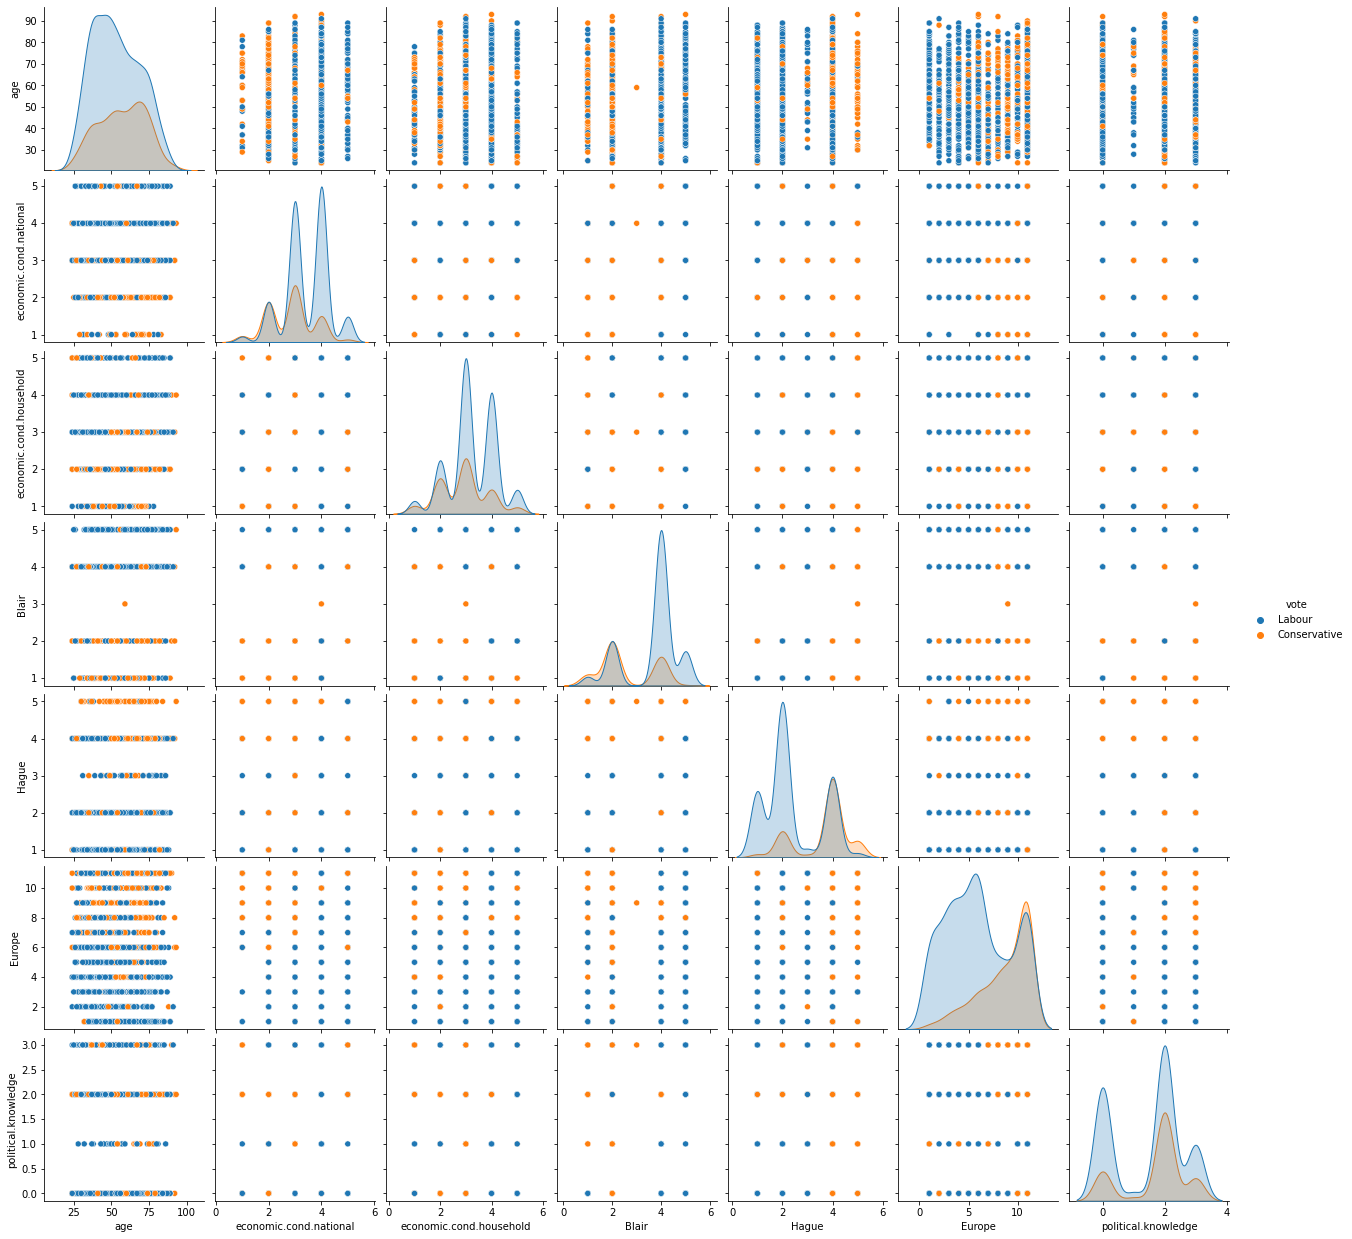

In [38]:
sns.pairplot(df,hue="vote")

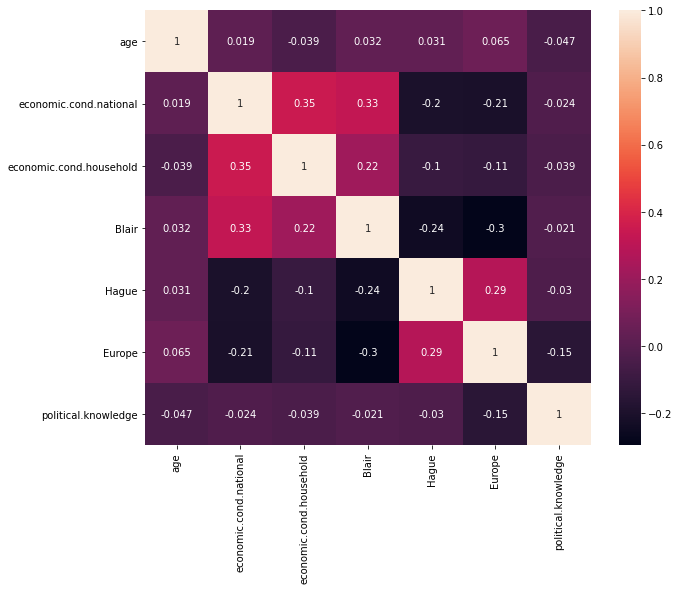

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Outlier Check**

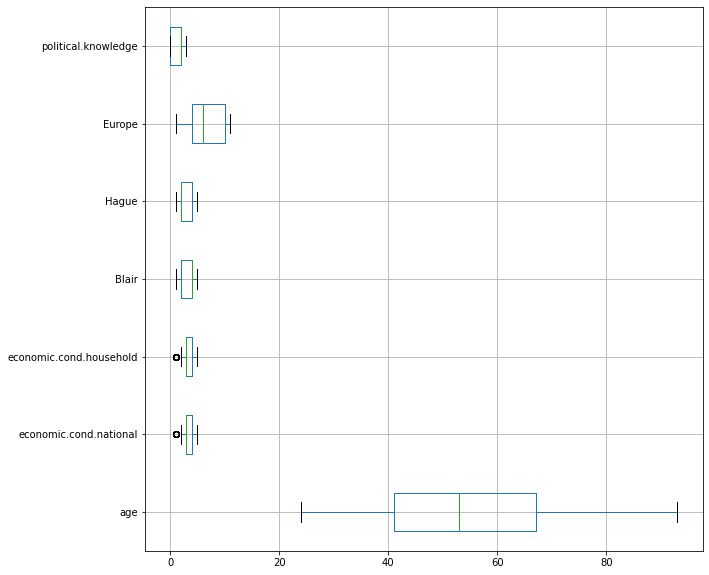

In [40]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

**outlier treatment**

In [41]:
#def remove_outlier(col):
  #  sorted(col)
   # Q1,Q3=np.percentile(col,[25,75])
   # IQR=Q3-Q1
   # lower_range= Q1-(1.5 * IQR)
   # upper_range= Q3+(1.5 * IQR)
   # return lower_range, upper_range

In [42]:
#lr,ur=remove_outlier(df["economic.cond.national"])
#df["economic.cond.national"]=np.where(df["economic.cond.national"]>ur,ur,df["economic.cond.national"])
#df["economic.cond.national"]=np.where(df["economic.cond.national"]<lr,lr,df["economic.cond.national"])

In [43]:
#lr,ur=remove_outlier(df["economic.cond.household"])
#df["economic.cond.household"]=np.where(df["economic.cond.household"]>ur,ur,df["economic.cond.household"])
#df["economic.cond.household"]=np.where(df["economic.cond.household"]<lr,lr,df["economic.cond.household"])

In [44]:
#plt.figure(figsize=(10,10))
#df[num].boxplot(vert=0)

**Get dummies**

In [45]:
df =pd.get_dummies(df, columns=["gender"],drop_first=True)

In [46]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [47]:
df['vote'] = LE.fit_transform(df['vote'])
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int32
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender_male              1517 non-null   uint8
dtypes: int32(1), int64(7), uint8(1)
memory usage: 134.5 KB


**Conservative is class 0 and Labour is class 1**

In [49]:
df.shape

(1517, 9)

**Gaussian Naive Bayes** - Basic model

**Naive Bayes doesn't require scaling as it is not distance based**

For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

In [50]:
X = df.drop("vote",axis=1)
y = df["vote"] 

In [51]:
y.value_counts('%')

1    0.69677
0    0.30323
Name: vote, dtype: float64

data is balanced

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,stratify=df["vote"] , random_state=1)

In [53]:
X_train.shape

(1061, 8)

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [55]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

**Gaussian Naive Bayes - Performance Matrix** - Basic model

In [56]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                     
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))        
print(metrics.classification_report(y_train, y_train_predict)) 

0.8199811498586239
[[226  96]
 [ 95 644]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [57]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         
print(metrics.classification_report(y_test, y_test_predict))    

0.8574561403508771
[[100  38]
 [ 27 291]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



In [58]:
NB_model.score(X_train, y_train)

0.8199811498586239

In [59]:
NB_model.score(X_test, y_test)

0.8574561403508771

**Accuracy score is almost same and hence the model is almost right fit. 
1-0.819 misclassification is there.
recall score is pretty good and indicates that the model is performing well.

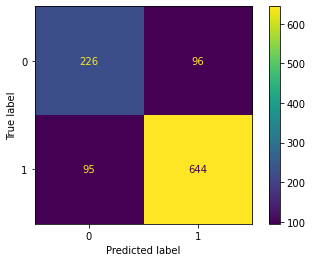

In [303]:
plot_confusion_matrix(NB_model,X_train,y_train);

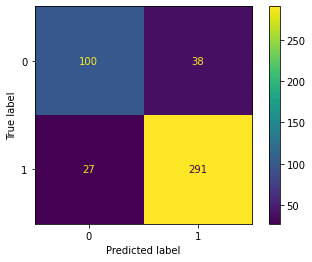

In [304]:
plot_confusion_matrix(NB_model,X_test,y_test);

**Gaussian Naive Bayes - Performance Matrix** - Final model

In [273]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [274]:
#cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [275]:
from sklearn.preprocessing import PowerTransformer

In [305]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=60)}

In [306]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=2, n_jobs=-1)

In [307]:
nbModel_grid.fit(X_train, y_train)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


GridSearchCV(cv=2, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 7.03813555e-01, 4.95353521e-01, 3.48636523e-01,
       2.45375111e-01, 1.72698329e-01, 1.21547425e-01, 8.55467254e-02,
       6.02089449e-02, 4.23758716e-02, 2.98247129e-02, 2.09910372e-02,
       1.47737765e-02, 1.03979842e-02, 7.31824222e-03, 5.15067808e-03,
       3.62511705e-03, 2.5514065...
       3.22459055e-06, 2.26951054e-06, 1.59731228e-06, 1.12421004e-06,
       7.91234262e-07, 5.56881399e-07, 3.91940677e-07, 2.75853162e-07,
       1.94149195e-07, 1.36644835e-07, 9.61724871e-08, 6.76875001e-08,
       4.76393801e-08, 3.35292415e-08, 2.35983347e-08, 1.66088278e-08,
       1.16895182e-08, 8.22724134e-09, 5.79044398e-09, 4.07539297e-09,
       2.86831681e-09, 2.01876025e-09, 1.42083083e-09, 1.00000000e-09])},
             verbose=1)

In [308]:
NB_model_final = nbModel_grid.best_estimator_
NB_model_final

GaussianNB(var_smoothing=0.00044062364277735685)

In [309]:
y_train_predict = NB_model_final.predict(X_train)
model_score = NB_model_final.score(X_train, y_train)                     
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))        
print(metrics.classification_report(y_train, y_train_predict)) 

0.82186616399623
[[225  97]
 [ 92 647]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       322
           1       0.87      0.88      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [310]:
y_train_predict = NB_model_final.predict(X_test)
model_score = NB_model_final.score(X_test, y_test)                     
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))        
print(metrics.classification_report(y_test, y_test_predict)) 

0.8618421052631579
[[100  38]
 [ 27 291]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



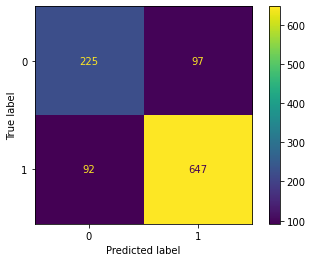

In [311]:
plot_confusion_matrix(NB_model_final,X_train,y_train);

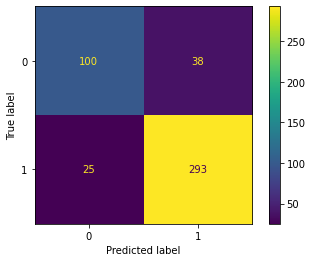

In [302]:
plot_confusion_matrix(NB_model_final,X_test,y_test);

##########################################################################################################

**Logistic Regression** - Basic model

In [188]:
X = df.drop("vote",axis=1)
y = df["vote"] 

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,stratify=df["vote"] , random_state=1)

In [190]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000,verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, verbose=True)

In [191]:
model.score(X_train, y_train)

0.8284637134778511

In [192]:
model.score(X_test, y_test)

0.8552631578947368

**Logistic Regression - Performance Matrix** - Basic model

In [193]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.877


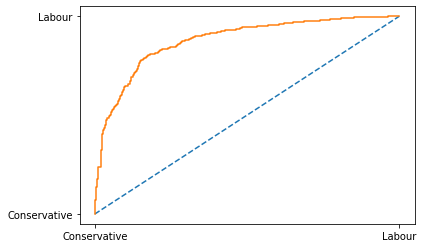

In [194]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot(['Conservative','Labour'], ['Conservative','Labour'], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [195]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

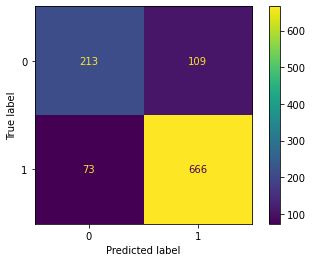

In [196]:
plot_confusion_matrix(model,X_train,y_train);

In [197]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061



AUC: 0.877


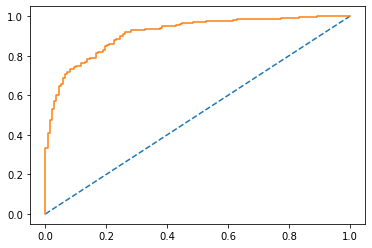

In [198]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

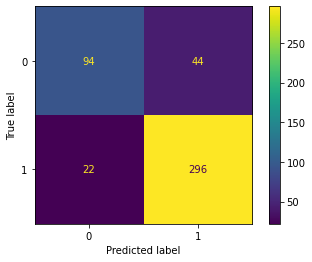

In [199]:
plot_confusion_matrix(model,X_test,y_test);

In [200]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



In [201]:
#X_scaled =  df.drop("vote",axis=1) 

In [202]:
#X_scaled[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]]=X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]].apply(zscore)

In [203]:
#X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30 , random_state=10,stratify=y)

In [204]:
#model = LogisticRegression(max_iter=10000,verbose=True,n_jobs=2)
#model.fit(X_scaled_train, y_train)

In [205]:
#model.score(X_scaled_train, y_train)

In [206]:
#model.score(X_scaled_test, y_test)

In [207]:
# predict probabilities
#probs = model.predict_proba(X_scaled_train)
# keep probabilities for the positive outcome only
#probs = probs[:, 1]
# calculate AUC
#auc = roc_auc_score(y_train, probs)
#print('AUC: %.3f' % auc)
# calculate roc curve
#train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
#plt.plot(['Conservative','Labour'], ['Conservative','Labour'], linestyle='--')
# plot the roc curve for the model
#plt.plot(train_fpr, train_tpr);

In [208]:
#ytrain_predict = model.predict(X_scaled_train)
#ytest_predict = model.predict(X_scaled_test)

In [209]:
#plot_confusion_matrix(model,X_scaled_train,y_train);

In [210]:
#print(classification_report(y_train, ytrain_predict))

In [211]:
# predict probabilities
#probs = model.predict_proba(X_scaled_test)
# keep probabilities for the positive outcome only
#probs = probs[:, 1]
# calculate AUC
#test_auc = roc_auc_score(y_test, probs)
#print('AUC: %.3f' % auc)
# calculate roc curve
#test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
#plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
#plt.plot(test_fpr, test_tpr);

In [212]:
#plot_confusion_matrix(model,X_scaled_test,y_test);

In [213]:
#print(classification_report(y_test, ytest_predict))

**Applying GridSearchCV for Logistic Regression**

**Trial#1**

In [214]:
grid={'penalty':['none','elasticnet'],
      'solver':['liblinear','lbfgs'],
      'tol':[0.0001,0.00001]}

In [216]:
model1 = LogisticRegression(max_iter=10000,n_jobs=2,random_state = 1)

In [218]:
grid_search1 = GridSearchCV(estimator = model1, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1_micro')

In [219]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['none', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1_micro')

In [220]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', random_state=1)


In [221]:
best_model1 = grid_search1.best_estimator_

In [224]:
# Prediction on the training set

ytrain_predict1 = best_model1.predict(X_train)
ytest_predict1 = best_model1.predict(X_test)

In [225]:
## Getting the probabilities on the test set

ytest_predict_prob1=best_model1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.199505,0.800495
1,0.610930,0.389070
2,0.083432,0.916568
3,0.030807,0.969193
4,0.135986,0.864014


              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061
 



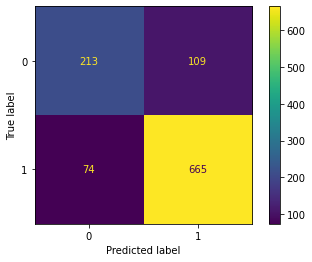

In [226]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model1,X_train,y_train)
print(classification_report(y_train, ytrain_predict1),'\n');

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456
 



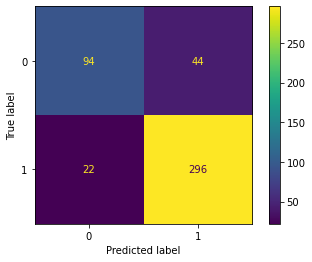

In [227]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model1,X_test,y_test)
print(classification_report(y_test, ytest_predict1),'\n');

In [228]:
best_model1.score(X_train, y_train)

0.827521206409048

In [229]:
best_model1.score(X_test, y_test)

0.8552631578947368

**Trial#2**

In [230]:
grid={'penalty':['l1','l2'],
      'solver':['liblinear','lbfgs'],
      'tol':[0.00001,0.000001]}

In [231]:
model2 = LogisticRegression(max_iter=100000,n_jobs=2,random_state = 1)

In [232]:
grid_search2 = GridSearchCV(estimator = model2, param_grid = grid, cv = 4,n_jobs=-1,scoring='recall')

In [233]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(max_iter=100000, n_jobs=2,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs'],
                         'tol': [1e-05, 1e-06]},
             scoring='recall')

In [234]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-05} 

LogisticRegression(max_iter=100000, n_jobs=2, random_state=1, tol=1e-05)


In [235]:
best_model2 = grid_search2.best_estimator_

In [236]:
# Prediction on the training set

ytrain_predict2 = best_model2.predict(X_train)
ytest_predict2 = best_model2.predict(X_test)

In [237]:
## Getting the probabilities on the test set

ytest_predict_prob2=best_model2.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob2).head()

,0,1
0,0.201094,0.798906
1,0.608576,0.391424
2,0.084426,0.915574
3,0.031345,0.968655
4,0.136590,0.863410


              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061
 



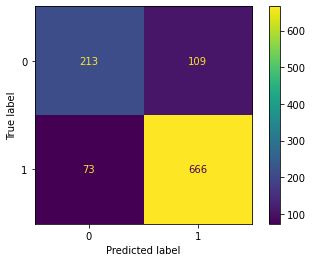

In [238]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model2,X_train,y_train)
print(classification_report(y_train, ytrain_predict2),'\n');

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456
 



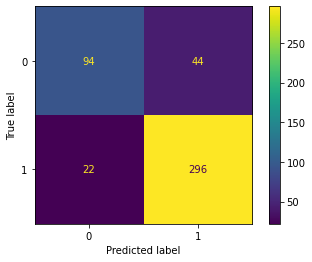

In [239]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model2,X_test,y_test)
print(classification_report(y_test, ytest_predict2),'\n');

In [240]:
best_model2.score(X_train, y_train)

0.8284637134778511

In [241]:
best_model2.score(X_test, y_test)

0.8552631578947368

**Trial#3**

In [242]:
grid={'penalty':['none','elasticnet'],
      'solver':['saga','newton-cg'],
      'tol':[0.0001,0.000001]}

In [243]:
model_3 = LogisticRegression(max_iter=10000,n_jobs=2,random_state = 1)

In [244]:
grid_search_3 = GridSearchCV(estimator = model_3, param_grid = grid, cv = 7,n_jobs=-1,scoring='f1')

In [245]:
grid_search_3.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['none', 'elasticnet'],
                         'solver': ['saga', 'newton-cg'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [246]:
print(grid_search_3.best_params_,'\n')
print(grid_search_3.best_estimator_)

{'penalty': 'none', 'solver': 'saga', 'tol': 1e-06} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', random_state=1,
                   solver='saga', tol=1e-06)


In [247]:
best_model_3 = grid_search_3.best_estimator_

In [248]:
# Prediction on the training set

ytrain_predict_3 = best_model_3.predict(X_train)
ytest_predict_3 = best_model_3.predict(X_test)

In [249]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model_3.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.199799,0.800201
1,0.612194,0.387806
2,0.083824,0.916176
3,0.030916,0.969084
4,0.136070,0.863930


              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061
 



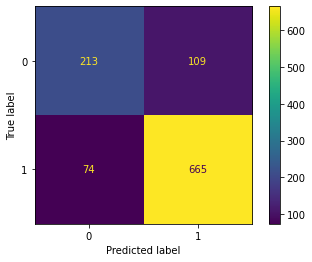

In [250]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model_3,X_train,y_train)
print(classification_report(y_train, ytrain_predict_3),'\n');

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456
 



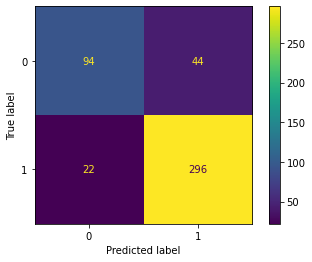

In [251]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_3,X_test,y_test)
print(classification_report(y_test, ytest_predict_3),'\n');

In [252]:
best_model_3.score(X_train, y_train)

0.827521206409048

In [253]:
best_model_3.score(X_test, y_test)

0.8552631578947368

AUC: 0.877


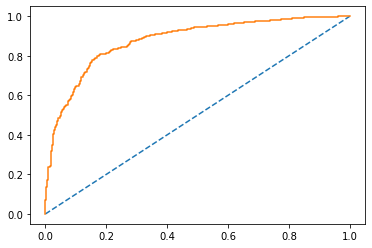

In [254]:
# predict probabilities
probs = best_model_3.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

AUC: 0.877


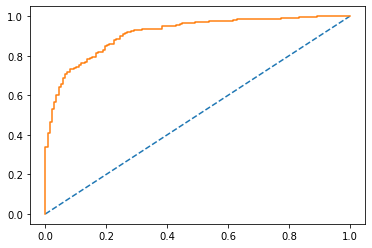

In [255]:
# predict probabilities
probs = best_model_3.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

0.1 

Accuracy Score 0.7201
F1 Score 0.8321 

Confusion Matrix


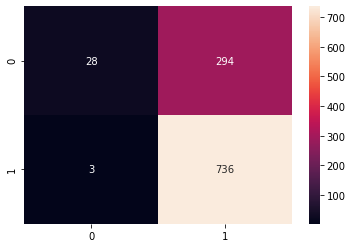

0.2 

Accuracy Score 0.7644
F1 Score 0.8526 

Confusion Matrix


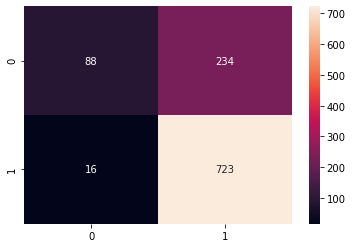

0.3 

Accuracy Score 0.7908
F1 Score 0.8641 

Confusion Matrix


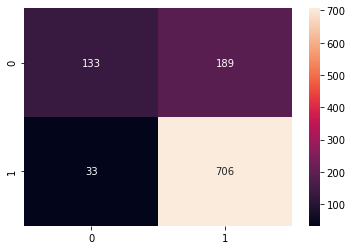

0.4 

Accuracy Score 0.8143
F1 Score 0.8746 

Confusion Matrix


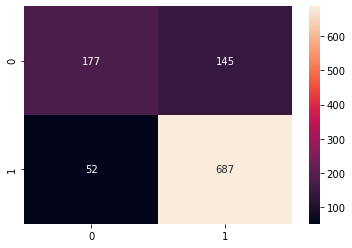

0.5 

Accuracy Score 0.8275
F1 Score 0.879 

Confusion Matrix


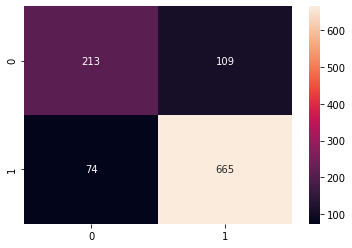

0.6 

Accuracy Score 0.8172
F1 Score 0.8671 

Confusion Matrix


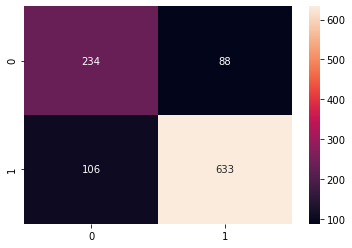

0.7 

Accuracy Score 0.8096
F1 Score 0.8549 

Confusion Matrix


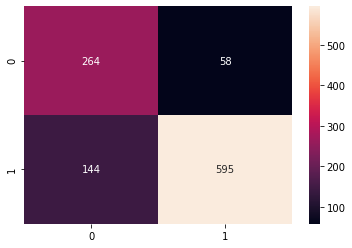

0.8 

Accuracy Score 0.7512
F1 Score 0.796 

Confusion Matrix


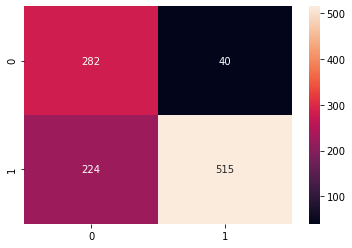

0.9 

Accuracy Score 0.6513
F1 Score 0.6771 

Confusion Matrix


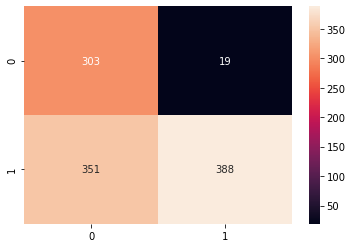

In [256]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(best_model_3.predict_proba(X_train)[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

###############################################################################################################################

**LinearDiscriminantAnalysis** - Basic model

In [667]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

**Basic model - with stratified test and train data**

In [668]:
X = df.drop("vote",axis=1)
y = df["vote"] 

In [669]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,stratify=df["vote"] , random_state=1)

In [670]:
lda = LinearDiscriminantAnalysis()
model_lda=lda.fit(X_train,y_train)

In [680]:
#  cut-off value of 0.5
pred_class_train = model_lda.predict(X_train)

pred_class_test = model_lda.predict(X_test)

In [681]:
# Training Data Probability Prediction
pred_prob_train= model_lda.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model_lda.predict_proba(X_test)

**LinearDiscriminantAnalysis - Performance Matrix** - Basic model - with stratified test and train data

AUC: 0.877


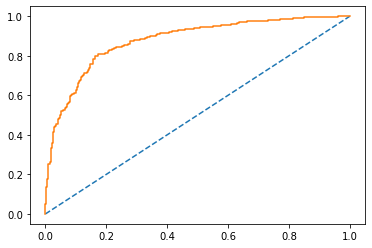

In [682]:
# predict probabilities
probs = model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.877


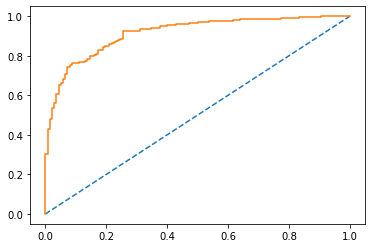

In [683]:
# predict probabilities
probs = model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [684]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 



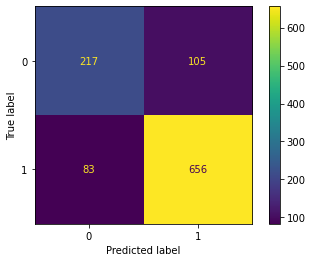

In [685]:
plot_confusion_matrix(model_lda,X_train,y_train);

In [ ]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

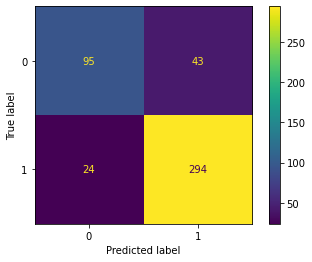

In [686]:
plot_confusion_matrix(model_lda,X_test,y_test);

In [ ]:
# **Basic model - without stratified test and train data**

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
#lda1 = LinearDiscriminantAnalysis()
#model1=lda1.fit(X_train1,y_train1)

In [ ]:
#  cut-off value of 0.5
#pred_class_train1 = model1.predict(X_train1)

#pred_class_test1 = model1.predict(X_test1)

In [ ]:
# Training Data Probability Prediction
#pred_prob_train1= model1.predict_proba(X_train1)

# Test Data Probability Prediction
#pred_prob_test1 = model1.predict_proba(X_test1)

In [ ]:
# AUC and ROC for the training data

# calculate AUC
#auc1 = metrics.roc_auc_score(y_train1,pred_prob_train1[:,1])
#print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
#fpr, tpr, thresholds = metrics.roc_curve(y_train1,pred_prob_train1[:,1])
#plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
#plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
#auc1 = metrics.roc_auc_score(y_test1,pred_prob_test1[:,1])
#print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
#fpr, tpr, thresholds = metrics.roc_curve(y_test1,pred_prob_test1[:,1])
#plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
#plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
#plt.legend(loc='best')
#plt.show()

In [ ]:
#print('Classification Report of the training data:\n\n',metrics.classification_report(y_train1,pred_class_train1),'\n')

In [ ]:
#plot_confusion_matrix(model1,X_train1,y_train1);


In [ ]:
#print('Classification Report of the test data:\n\n',metrics.classification_report(y_test1,pred_class_test1),'\n')

In [ ]:
#plot_confusion_matrix(model1,X_test1,y_test1);

**LinearDiscriminantAnalysis - Final Tuned Model**

**Finding best threshold value for Labour class as the class of interest(1)**

0.1 

Accuracy Score 0.7427
F1 Score 0.8427 

Confusion Matrix


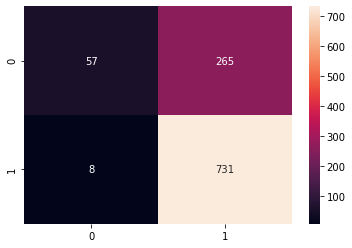

0.2 

Accuracy Score 0.7813
F1 Score 0.8606 

Confusion Matrix


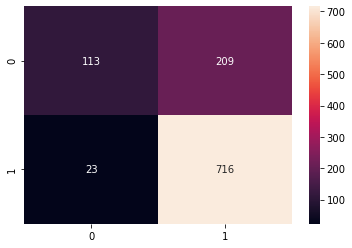

0.3 

Accuracy Score 0.8011
F1 Score 0.8687 

Confusion Matrix


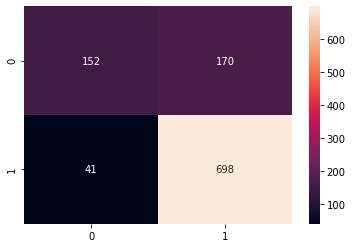

0.4 

Accuracy Score 0.819
F1 Score 0.8763 

Confusion Matrix


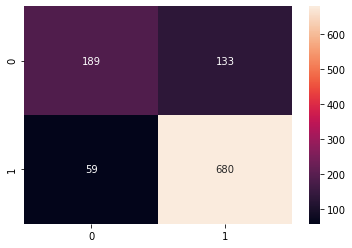

0.5 

Accuracy Score 0.8228
F1 Score 0.8747 

Confusion Matrix


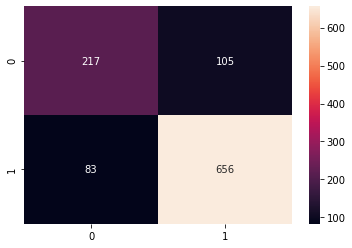

0.6 

Accuracy Score 0.82
F1 Score 0.8687 

Confusion Matrix


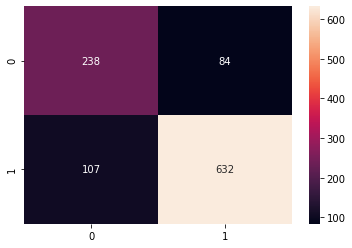

0.7 

Accuracy Score 0.8115
F1 Score 0.8565 

Confusion Matrix


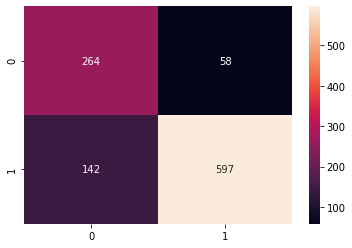

0.8 

Accuracy Score 0.7568
F1 Score 0.8028 

Confusion Matrix


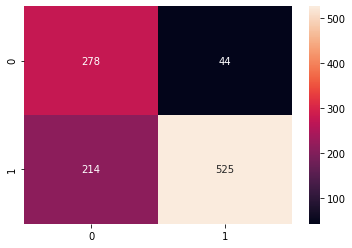

0.9 

Accuracy Score 0.6758
F1 Score 0.7099 

Confusion Matrix


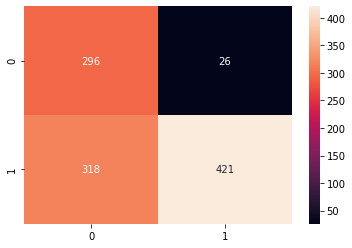

In [687]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [688]:
#pred_prob_test

In [689]:
#pred_prob_test[:,1]

**Best f1 score appears for the threshold value 0.4 with the class of interest as 1(Labour Class)**

In [690]:

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

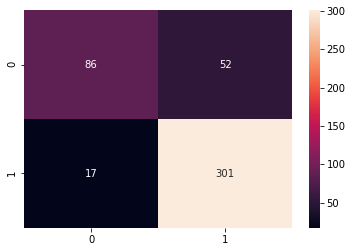

In [691]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g');

In [692]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.83      0.62      0.71       138
           1       0.85      0.95      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.78      0.81       456
weighted avg       0.85      0.85      0.84       456
 



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**KNN Model**

**Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered**

Now lets apply zscore on continues columns and see the performance for KNN

In [693]:
X_scaled =  df.drop("vote",axis=1) 
y = df["vote"]  

In [694]:
X_scaled[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]]=X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]].apply(zscore)

In [695]:
X_scaled.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,0
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,0
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1


In [696]:
from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30 , random_state=10,stratify=y)

In [697]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_scaled_train,y_train)

KNeighborsClassifier()

In [698]:
y_train_predict = KNN_model.predict(X_scaled_train)
model_score = KNN_model.score(X_scaled_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8605089538171536
[[240  82]
 [ 66 673]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       322
           1       0.89      0.91      0.90       739

    accuracy                           0.86      1061
   macro avg       0.84      0.83      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [699]:
y_test_predict = KNN_model.predict(X_scaled_test)
model_score = KNN_model.score(X_scaled_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8442982456140351
[[103  35]
 [ 36 282]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       138
           1       0.89      0.89      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.82      0.82       456
weighted avg       0.84      0.84      0.84       456



**Trying the basic model with different parameters**

In [700]:
N = np.sqrt(X_scaled_train.shape[0])
N

32.57299494980466

In [701]:
KNN_model1=KNeighborsClassifier(n_neighbors = 32) # weights='distance') #,algorithm='kd_tree')
KNN_model1.fit(X_scaled_train,y_train)

KNeighborsClassifier(n_neighbors=32)

In [702]:
y_train_predict1 = KNN_model1.predict(X_scaled_train)
model_score1 = KNN_model1.score(X_scaled_train, y_train)
print(model_score1)
print(metrics.confusion_matrix(y_train, y_train_predict1))
print(metrics.classification_report(y_train, y_train_predict1))

0.8284637134778511
[[220 102]
 [ 80 659]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.71       322
           1       0.87      0.89      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [703]:
y_test_predict1 = KNN_model1.predict(X_scaled_test)
model_score1 = KNN_model1.score(X_scaled_test, y_test)
print(model_score1)
print(metrics.confusion_matrix(y_test, y_test_predict1))
print(metrics.classification_report(y_test, y_test_predict1))

0.8442982456140351
[[100  38]
 [ 33 285]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       138
           1       0.88      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



**KNN model - Fine tuning**

In [704]:
N = np.sqrt(X_scaled_train.shape[0])
N

32.57299494980466

In [705]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_scaled_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_scaled_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.24122807017543857,
 0.18201754385964908,
 0.1557017543859649,
 0.15131578947368418,
 0.1578947368421053,
 0.16228070175438591,
 0.1600877192982456,
 0.1557017543859649,
 0.1578947368421053,
 0.16228070175438591,
 0.15131578947368418,
 0.1578947368421053,
 0.1557017543859649,
 0.1557017543859649,
 0.1600877192982456,
 0.16447368421052633,
 0.1600877192982456,
 0.1535087719298246,
 0.14692982456140347,
 0.14912280701754388]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

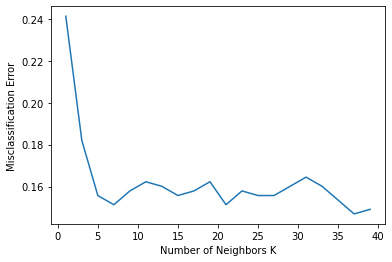

In [706]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,40,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 37 it is giving the best test accuracy lets check train and test for K=37 with other evaluation metrics

In [707]:

KNN_model=KNeighborsClassifier(n_neighbors=37) #,weights='distance')
KNN_model.fit(X_scaled_train,y_train)

KNeighborsClassifier(n_neighbors=37)

In [708]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_scaled_train)
model_score = KNN_model.score(X_scaled_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.825636192271442
[[213 109]
 [ 76 663]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



In [709]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_scaled_test)
model_score = KNN_model.score(X_scaled_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8530701754385965
[[101  37]
 [ 30 288]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       138
           1       0.89      0.91      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.85      0.85      0.85       456



**The difference between the train and test accuracy score is almost nil and hence the model seems to be right fit**

In [710]:
KNN_model=KNeighborsClassifier(n_neighbors=21)
KNN_model.fit(X_scaled_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [711]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_scaled_train)
model_score = KNN_model.score(X_scaled_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.824693685202639
[[215 107]
 [ 79 660]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       322
           1       0.86      0.89      0.88       739

    accuracy                           0.82      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [712]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6995614035087719
[[  1 137]
 [  0 318]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       138
           1       0.70      1.00      0.82       318

    accuracy                           0.70       456
   macro avg       0.85      0.50      0.42       456
weighted avg       0.79      0.70      0.58       456



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### Boosting

**Ada Boost**

In [442]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1,learning_rate=0.5)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=1)

In [443]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8350612629594723
[[220 102]
 [ 73 666]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.72       322
           1       0.87      0.90      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



0.8350612629594723


<AxesSubplot:>

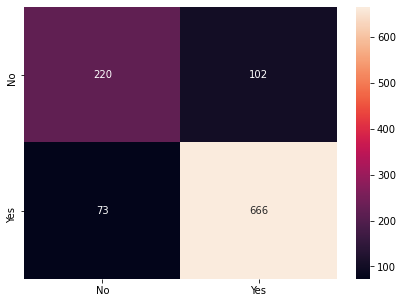

In [444]:
y_predict = ADB_model.predict(X_train)

print(ADB_model.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

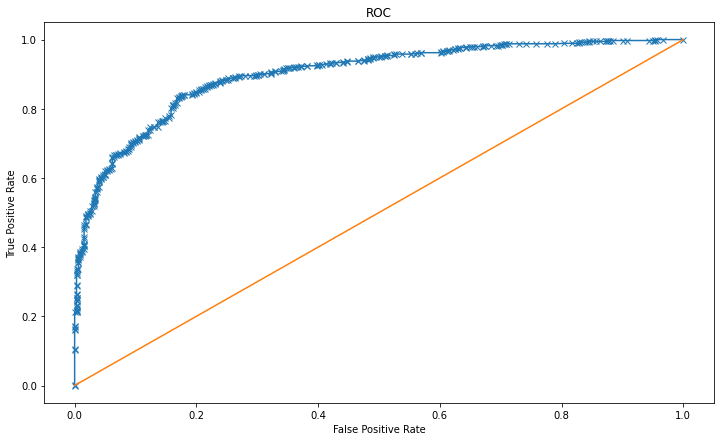

Area under Curve is 0.8998898965363635


In [445]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,ADB_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='ADB_model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,ADB_model.predict_proba(X_train)[:,1]))

In [446]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8421052631578947
[[ 95  43]
 [ 29 289]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



0.8421052631578947


<AxesSubplot:>

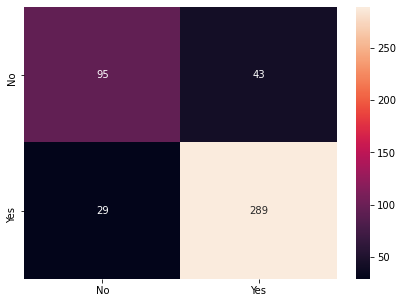

In [447]:
y_predict = ADB_model.predict(X_test)

print(ADB_model.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

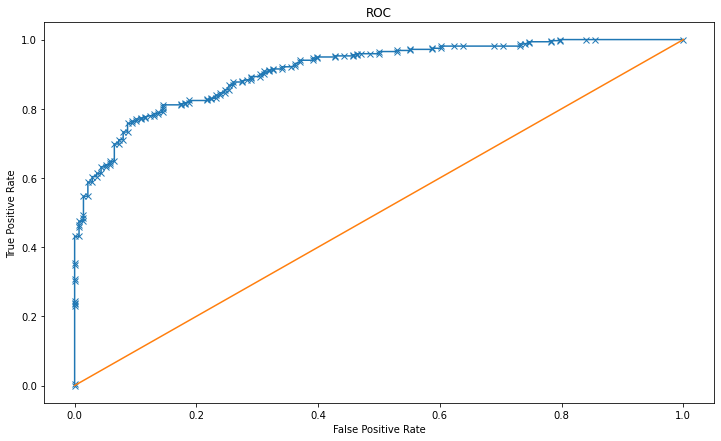

Area under Curve is 0.9102520280740133


In [448]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,ADB_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='ADB_model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,ADB_model.predict_proba(X_test)[:,1]))

**AdaBoost - Fine tuning**

In [527]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=27,random_state=1,learning_rate=0.8)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=27, random_state=1)

In [528]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8444863336475024
[[229  93]
 [ 72 667]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       322
           1       0.88      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



0.8444863336475024


<AxesSubplot:>

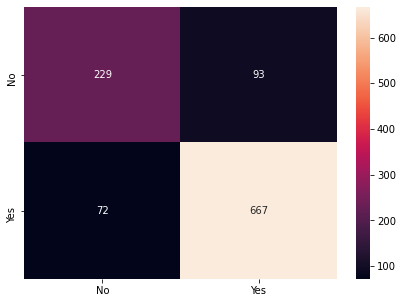

In [529]:
y_predict = ADB_model.predict(X_train)

print(ADB_model.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

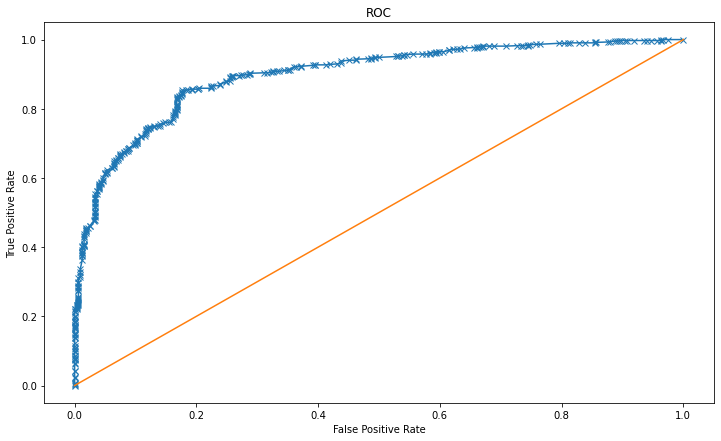

Area under Curve is 0.8973831516486104


In [530]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,ADB_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='ADB_model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,ADB_model.predict_proba(X_train)[:,1]))

In [531]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8377192982456141
[[ 94  44]
 [ 30 288]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.84       456



0.8377192982456141


<AxesSubplot:>

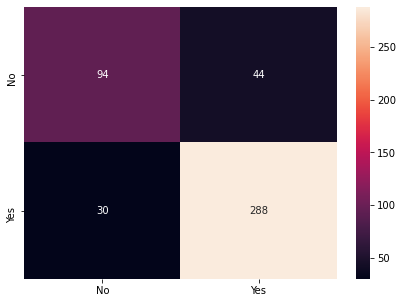

In [532]:
y_predict = ADB_model.predict(X_test)

print(ADB_model.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

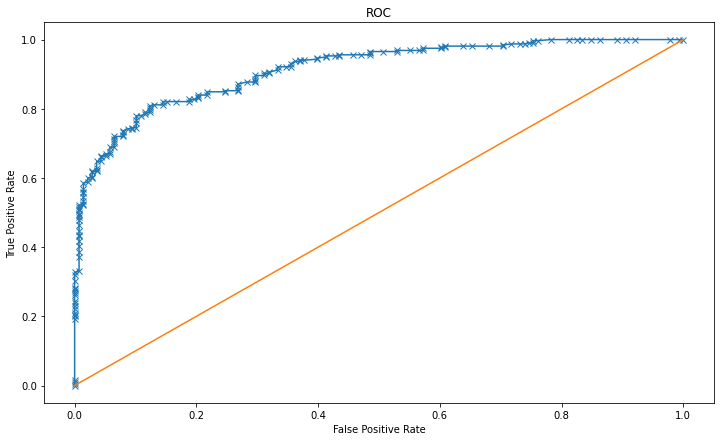

Area under Curve is 0.9130092972381735


In [533]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,ADB_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='ADB_model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,ADB_model.predict_proba(X_test)[:,1]))

**Gradient Boosting**

In [534]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [535]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.885956644674835
[[250  72]
 [ 49 690]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       322
           1       0.91      0.93      0.92       739

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.88      0.89      0.88      1061



0.885956644674835


<AxesSubplot:>

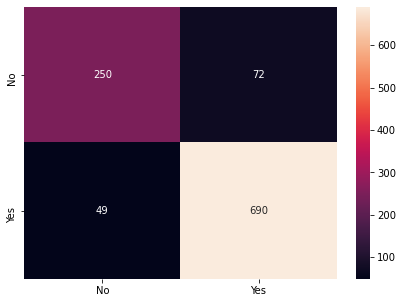

In [536]:
y_predict = gbcl.predict(X_train)

print(gbcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

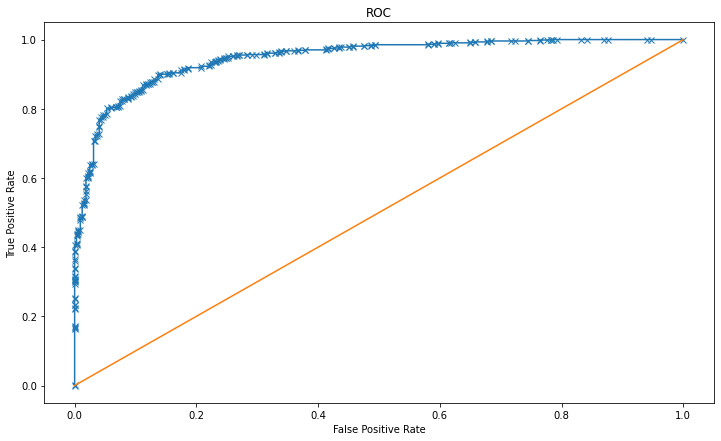

Area under Curve is 0.8973831516486104


In [537]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,gbcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Gradient_boosting_model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,ADB_model.predict_proba(X_train)[:,1]))

In [538]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8421052631578947
[[ 95  43]
 [ 29 289]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



0.8421052631578947


<AxesSubplot:>

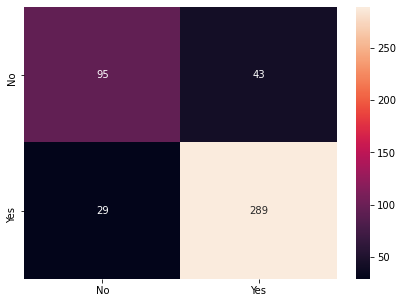

In [539]:
y_predict = gbcl.predict(X_test)

print(gbcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

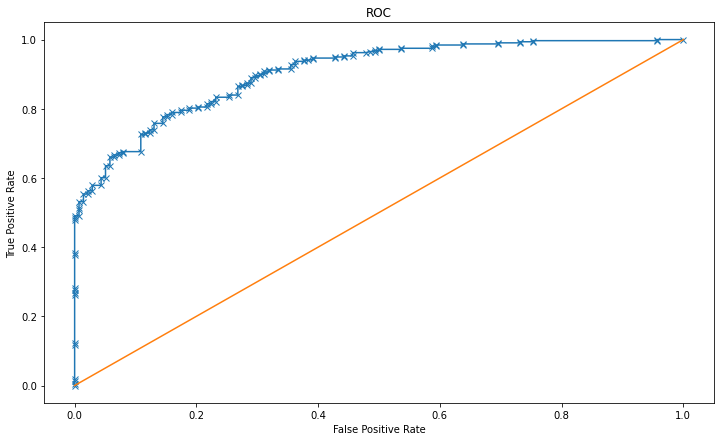

Area under Curve is 0.9043159237991067


In [540]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,gbcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Gradient_boosting_model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,gbcl.predict_proba(X_test)[:,1]))

**Gradient Boosting** - final model

In [656]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1,learning_rate=0.6,n_estimators=30, max_features=5)
gbcl = gbcl.fit(X_train, y_train)

In [657]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9076343072573044
[[263  59]
 [ 39 700]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       322
           1       0.92      0.95      0.93       739

    accuracy                           0.91      1061
   macro avg       0.90      0.88      0.89      1061
weighted avg       0.91      0.91      0.91      1061



0.9076343072573044


<AxesSubplot:>

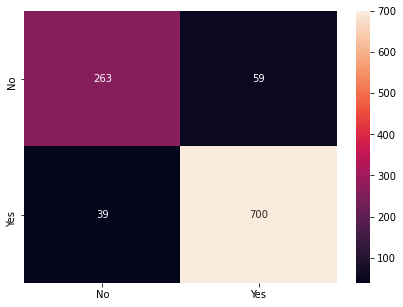

In [658]:
y_predict = gbcl.predict(X_train)

print(gbcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

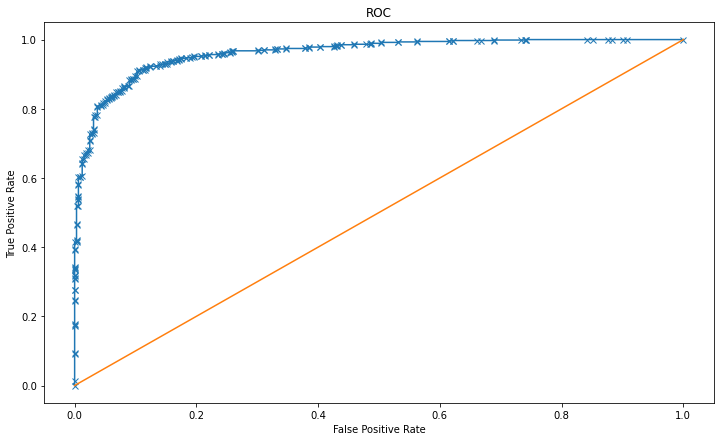

Area under Curve is 0.8973831516486104


In [659]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,gbcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Gradient_boosting_model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,ADB_model.predict_proba(X_train)[:,1]))

In [660]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8377192982456141
[[ 94  44]
 [ 30 288]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.84       456



0.8377192982456141


<AxesSubplot:>

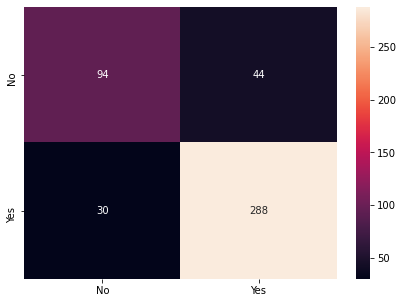

In [661]:
y_predict = gbcl.predict(X_test)

print(gbcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

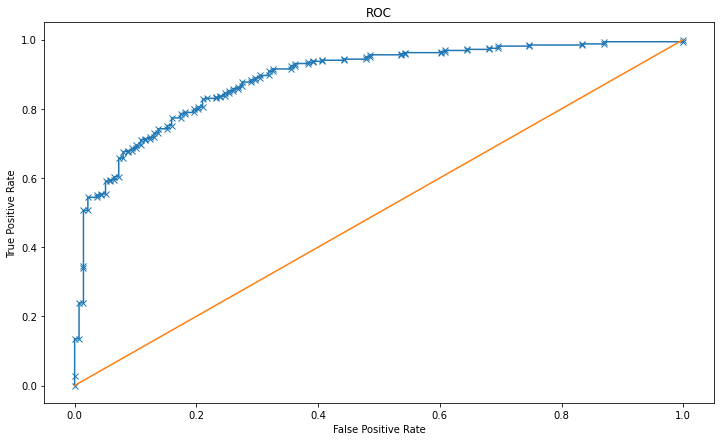

Area under Curve is 0.8891851244189226


In [662]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,gbcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Gradient_boosting_model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,gbcl.predict_proba(X_test)[:,1]))

**Bagging - Basic model using Random forest classifier**

In [316]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [317]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,stratify=df["vote"] , random_state=1)

In [321]:
rf=RandomForestClassifier(random_state=1)

Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1) 
Bagging_model.fit(X_train, y_train)



BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [322]:
# Training Data Probability Prediction
pred_prob_train= Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = Bagging_model.predict_proba(X_test)

0.9679547596606974


<AxesSubplot:>

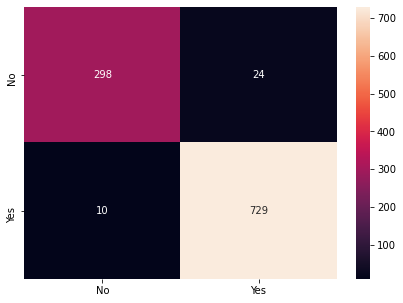

In [323]:
y_predict = Bagging_model.predict(X_train)

print(Bagging_model.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [324]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9679547596606974
[[298  24]
 [ 10 729]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       322
           1       0.97      0.99      0.98       739

    accuracy                           0.97      1061
   macro avg       0.97      0.96      0.96      1061
weighted avg       0.97      0.97      0.97      1061



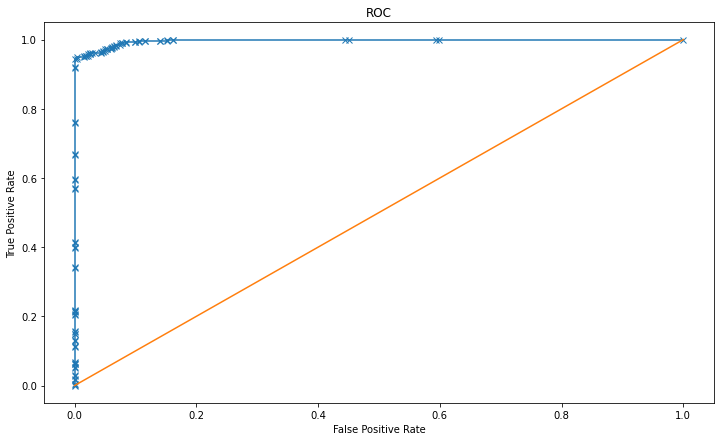

Area under Curve is 0.9968481832928501


In [325]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,Bagging_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Bagging_Model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,Bagging_model.predict_proba(X_train)[:,1]))

In [326]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8508771929824561
[[ 95  43]
 [ 25 293]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.83      0.80      0.82       456
weighted avg       0.85      0.85      0.85       456



0.8508771929824561


<AxesSubplot:>

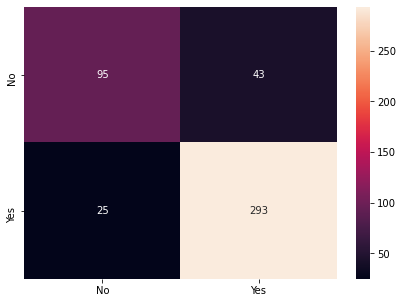

In [327]:
y_predict = Bagging_model.predict(X_test)

print(Bagging_model.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

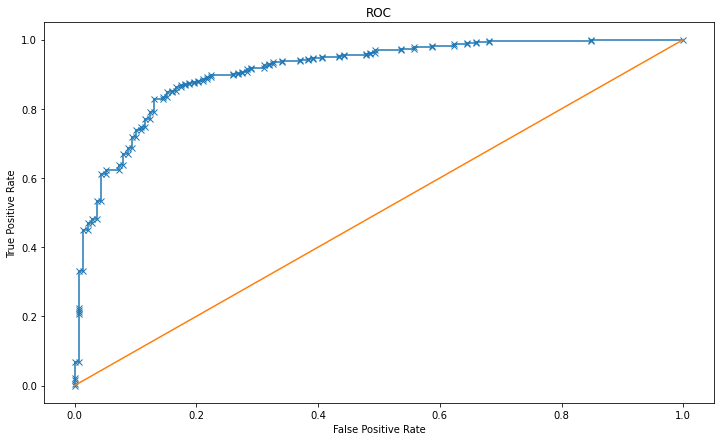

Area under Curve is 0.9106508066721357


In [328]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,Bagging_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Bagging_Model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,Bagging_model.predict_proba(X_test)[:,1]))

**Bagging -Fine-tuned model using Random forest classifier**

In [749]:
Bagging_model_final=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1,max_samples=15,
    max_features=5) 
Bagging_model_final.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  max_features=5, max_samples=15, n_estimators=100,
                  random_state=1)

In [750]:
# Training Data Probability Prediction
pred_prob_train_rf = Bagging_model_final.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_rf = Bagging_model_final.predict_proba(X_test)

0.6965127238454288


<AxesSubplot:>

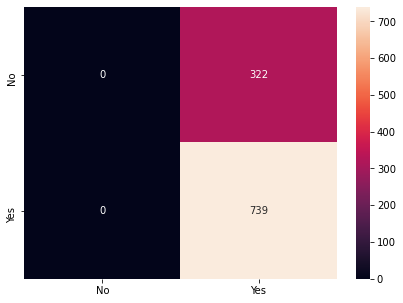

In [751]:
y_predict_rf = Bagging_model_final.predict(X_train)

print(Bagging_model_final.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict_rf,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [437]:
## Performance Matrix on train data set
y_train_predict_rf = Bagging_model_final.predict(X_train)
model_score =Bagging_model_final.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_rf))
print(metrics.classification_report(y_train, y_train_predict_rf))

0.764373232799246
[[ 87 235]
 [ 15 724]]
              precision    recall  f1-score   support

           0       0.85      0.27      0.41       322
           1       0.75      0.98      0.85       739

    accuracy                           0.76      1061
   macro avg       0.80      0.62      0.63      1061
weighted avg       0.78      0.76      0.72      1061



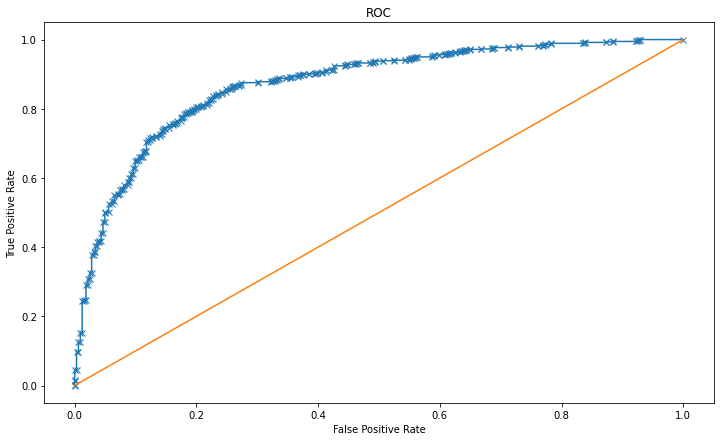

Area under Curve is 0.8714626110490087


In [438]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,Bagging_model_final.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Bagging_Model_final')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,Bagging_model_final.predict_proba(X_train)[:,1]))

In [439]:
## Performance Matrix on test data set
y_test_predict_rf = Bagging_model_final.predict(X_test)
model_score = Bagging_model_final.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_rf))
print(metrics.classification_report(y_test, y_test_predict_rf))

0.7741228070175439
[[ 42  96]
 [  7 311]]
              precision    recall  f1-score   support

           0       0.86      0.30      0.45       138
           1       0.76      0.98      0.86       318

    accuracy                           0.77       456
   macro avg       0.81      0.64      0.65       456
weighted avg       0.79      0.77      0.73       456



0.7741228070175439


<AxesSubplot:>

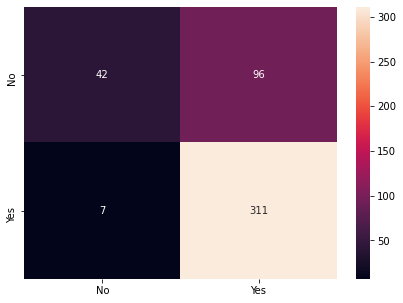

In [440]:
y_predict_rf = Bagging_model_final.predict(X_test)

print(Bagging_model_final.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict_rf,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

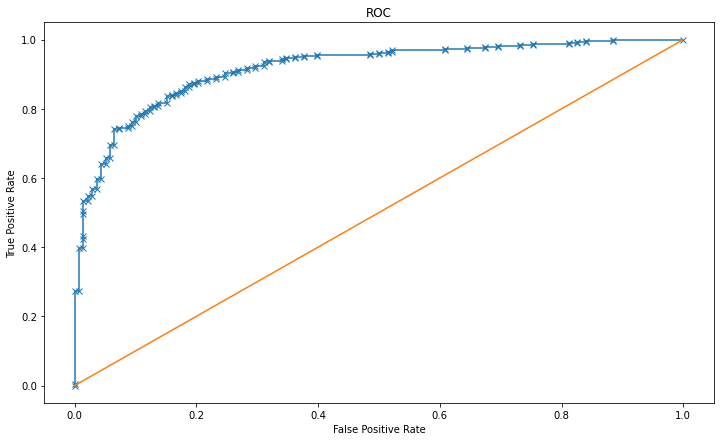

Area under Curve is 0.9161425576519917


In [441]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,Bagging_model_final.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Bagging_Model_final')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,Bagging_model_final.predict_proba(X_test)[:,1]))

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Problem 2

In [ ]:

from nltk.stem.snowball import SnowballStemmer
import json
import re
import string
import numpy as np   
import pandas as pd   

In [ ]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()


In [ ]:
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Roosevelt

In [ ]:
Kennedy = inaugural.raw('1961-Kennedy.txt')
Kennedy

In [ ]:
Nixon = inaugural.raw('1973-Nixon.txt')
Nixon

In [ ]:
type(Roosevelt)

In [ ]:
#def Convert(string):
  #  li = list(string.split("\n\n"))
  #  return li


In [ ]:
#roosevelt = Convert(Roosevelt)
#type(roosevelt)

In [ ]:
#kennedy = Convert(Kennedy)
#type(kennedy)

In [ ]:
#nixon = Convert(Nixon)
#type(nixon)

In [ ]:
from nltk import word_tokenize, sent_tokenize

In [ ]:
roosevelt_sent = nltk.sent_tokenize(Roosevelt)
roosevelt_sent

In [ ]:
kennedy_sent = nltk.sent_tokenize(Kennedy)
kennedy_sent

In [ ]:
nixon_sent = nltk.sent_tokenize(Nixon)
nixon_sent

In [ ]:
roosevelt = pd.DataFrame(roosevelt_sent)
kennedy = pd.DataFrame(kennedy_sent)
nixon = pd.DataFrame(nixon_sent)

In [ ]:
roosevelt.columns = ['text']
kennedy.columns = ['text']
nixon.columns = ['text']

In [ ]:
roosevelt['word_count'] = [len(x.split()) for x in roosevelt['text'].tolist()]
kennedy['word_count'] = [len(x.split()) for x in kennedy['text'].tolist()]
nixon['word_count'] = [len(x.split()) for x in nixon['text'].tolist()]

roosevelt['character_count'] = roosevelt['text'].str.len()
kennedy['character_count'] = kennedy['text'].str.len()
nixon['character_count'] = nixon['text'].str.len()

In [ ]:
roosevelt.head()

In [ ]:
kennedy.head()

In [ ]:
nixon.head()

In [ ]:
print("Number of sentences in Roosevelt's speech is ", roosevelt.shape[0])
print("Number of sentences in Kennedy's speech is ", kennedy.shape[0])
print("Number of sentences in Nixon's speech is ", nixon.shape[0])

In [ ]:
print("Number of words in Roosevelt's speech is ", roosevelt.word_count.sum())
print("Number of words in Kennedy's speech is ", kennedy.word_count.sum())
print("Number of words in Nixon's speech is ", nixon.word_count.sum())

In [ ]:
print("Number of characters in Roosevelt's speech is ", roosevelt.character_count.sum())
print("Number of characters in Kennedy's speech is ", kennedy.character_count.sum())
print("Number of characters in Nixon's speech is ", nixon.character_count.sum())

**Preprocessing**

In [ ]:
roosevelt_new = roosevelt.copy(deep = True)
kennedy_new = kennedy.copy(deep=True)
nixon_new = nixon.copy(deep=True)

**Converting to lowercase**

In [ ]:
roosevelt_new['text'] = roosevelt_new['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
kennedy_new['text'] = kennedy_new['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
nixon_new['text'] = nixon_new['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
roosevelt_new['text'].head()

**Removal of StopWords**

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
roosevelt_new['text'] = roosevelt_new['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
kennedy_new['text'] = kennedy_new['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
nixon_new['text'] = nixon_new['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
print("Number of words in Roosevelt's speech before removing stop word is ", roosevelt.word_count.sum())
print("Number of words in Kennedy's speech before removing stop word is ", kennedy.word_count.sum())
print("Number of words in Nixon's speech before removing stop word is  ", nixon.word_count.sum())

In [ ]:
roosevelt_new['words_w_o_Stopword'] = [len(x.split()) for x in roosevelt_new['text'].tolist()]
kennedy_new['words_w_o_Stopword'] = [len(x.split()) for x in kennedy_new['text'].tolist()]
nixon_new['words_w_o_Stopword'] = [len(x.split()) for x in nixon_new['text'].tolist()]

In [ ]:
print("Number of words in Roosevelt's speech after removing stop word is ", roosevelt_new.words_w_o_Stopword.sum())
print("Number of words in Kennedy's speech after removing stop word is ", kennedy_new.words_w_o_Stopword.sum())
print("Number of words in Nixon's speech after removing stop word is  ", nixon_new.words_w_o_Stopword.sum())

In [ ]:
roosevelt['text'][3]

In [ ]:
roosevelt_new['text'][3]

**Removing Punctuation**

In [ ]:

roosevelt_new['text'] = roosevelt_new['text'].str.replace('[^\w\s]','')
kennedy_new['text'] = kennedy_new['text'].str.replace('[^\w\s]','')
nixon_new['text'] = nixon_new['text'].str.replace('[^\w\s]','')

**Stemming**

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [ ]:
roosevelt_new['text'] = roosevelt_new['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
kennedy_new['text'] = kennedy_new['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
nixon_new['text'] = nixon_new['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

**Checking for special character**

In [ ]:
roosevelt_new['spl'] = roosevelt_new['text'].apply(lambda x: len([x for x in x.split() if x.startswith('--')]))
kennedy_new['spl'] = kennedy_new['text'].apply(lambda x: len([x for x in x.split() if x.startswith('--')]))
nixon_new['spl'] = nixon_new['text'].apply(lambda x: len([x for x in x.split() if x.startswith('--')]))

In [ ]:
roosevelt_new['spl'].sum()

In [ ]:
kennedy_new['spl'].sum()

In [ ]:
nixon_new['spl'].sum()

**Word Cloud**

In [ ]:
roosevelt_wc = ' '.join(roosevelt_new['text'])
kennedy_wc = ' '.join(kennedy_new['text'])
nixon_wc = ' '.join(nixon_new['text'])

In [ ]:
roosevelt_wc

In [ ]:
import matplotlib.pyplot as plt
import matplotlib


from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(roosevelt_wc) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt's speech(after cleaning)!!")
plt.show()

In [ ]:

from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(kennedy_wc) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy's speech(after cleaning)!!")
plt.show()

In [ ]:

from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(nixon_wc) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon's speech(after cleaning)!!")
plt.show()

In [ ]:
roosevelt_all_Words=[x for x in pd.Series(' '.join(roosevelt_new['text']).split())] 
print("The top three words used most frequently by Roosevelt are " , nltk.FreqDist(roosevelt_all_Words).most_common(3))

In [ ]:
kennedy_all_Words=[x for x in pd.Series(' '.join(kennedy_new['text']).split())] 
print("The top three words used most frequently by Kennedy are " , nltk.FreqDist(kennedy_all_Words).most_common(3))

In [ ]:
nixon_all_Words=[x for x in pd.Series(' '.join(nixon_new['text']).split())] 
print("The top three words used most frequently by Nixon are " , nltk.FreqDist(nixon_all_Words).most_common(3))

In [ ]:
#pip install wordcloud

**END**